# OPTIMIZATION FOR DATA SCIENCE - HOMEWORK 1

Jacopo Guidolin: jacopo.guidolin@studenti.unipd.it

Mattia Miolato: mattia.miolato@studenti.unipd.it

Filippo Santin: filippo.santin@studenti.unipd.it

Giovanni Vedana: giovanni.vedana.1@studenti.unipd.it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import matplotlib.patches as mpl_patches
from scipy.spatial.distance import cdist

## Random Dataset

In [ ]:
# Generation of the data
np.random.seed(42)

x_lab1 = np.random.randn(20) - 1.5   # N(-2,1)
y_lab1 = np.random.randn(20) - 1.5

x_lab2 = np.random.randn(20) + 1.5    # N(-2,1)
y_lab2 = np.random.randn(20) + 1.5

x_lab = np.concatenate((x_lab1, x_lab2))
y_lab = np.concatenate((y_lab1, y_lab2))


x1 = np.random.randn(80) - 1.5
y1 = np.random.randn(80) - 1.5

x2 = np.random.randn(80) + 1.5
y2 = np.random.randn(80) + 1.5

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

n_labelled = 40

In [ ]:
known_points = np.array(list(zip(x_lab,y_lab)))

unknown_points = np.array(list(zip(x,y)))

In [ ]:
labels = np.ones(40)
labels[:20] = -1

In [ ]:
true_values = np.ones((160,))
true_values[:80] = -1

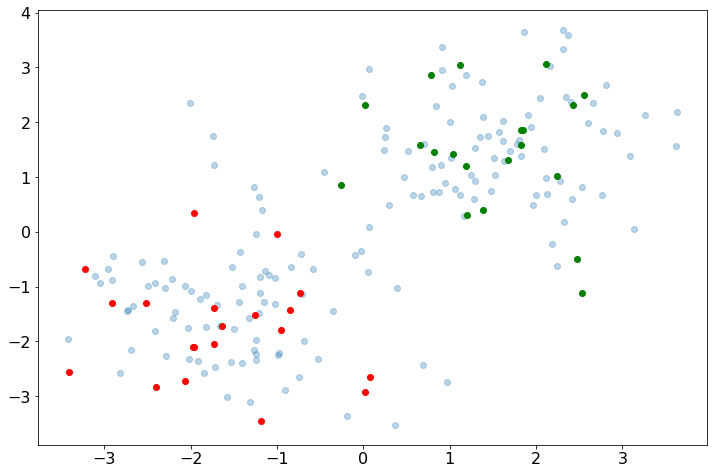

In [ ]:
_ = plt.figure(figsize = (12,8))
_ = plt.scatter(x, y, marker = 'o',alpha = 0.3)

_ = plt.scatter(x_lab[labels == -1], y_lab[labels == -1],color='red', marker = 'o')
_ = plt.scatter(x_lab[labels == 1], y_lab[labels == 1], color = 'green', marker = 'o')  
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16) 

In [ ]:
labels = labels.reshape((-1,1))

In [ ]:
def similarity(a,b):
    return np.exp(-np.dot(a-b, a-b)/2)

In [ ]:
# LOSS FUNCTION
def loss(W, W_bar, labels, y):

    Y1 = (labels - y.T)**2
    Y2 = (y - y.T)**2
    
    loss = np.sum(W * Y1) + 0.5 * np.sum(W_bar * Y2)
    return loss

In [ ]:
# OPTIMIZATION
def optimization(known_points, unknown_points, labels, true_values, method, rate = 0.0001, epochs = 5000, tol = 1e-4): 
    W = cdist(known_points, unknown_points, similarity)
    W_bar = cdist(unknown_points, unknown_points, similarity)  
    size = unknown_points.shape[0]
    np.random.seed(42)
    y = (0.1 * np.random.randn(size)).reshape((-1,1))
    losses = []
    times = [0]
    epoch = 0
    diff = 1
    accuracies = []

    while diff > tol and epoch < epochs:
        
        value = loss(W, W_bar, labels, y)
        losses.append(value) 
        
        clusters = [-1 if c<0 else 1 for c in y]
        accuracy = np.sum([clusters[i] == true_values[i] for i in range(len(clusters))])/len(clusters)
        accuracies.append(accuracy)
        
        if (not epoch%200):
            print('Epoch: ' + str(epoch) + ', loss: ' + str(round(value,6))+ ', accuracy: ' + str(accuracy))
        
        if method == 'gd':
            
            t1 = time.time()
            grad = 2 * np.sum(W * ((-labels) + y.T), axis = 0) + 2 * np.sum(W_bar * ((-y) + y.T), axis = 0)
            grad = grad.reshape((size, 1))

            y -= rate * grad
            y = y.reshape((size, 1))
            t2 = time.time()
            times.append(t2 - t1 + times[-1])
            
            diff = abs(losses[-1] - losses[-2]) if len(losses) > 2 else 1

        if method == 'random':
            
            index = np.random.randint(size)
            
            t1 = time.time()
            grad = 2 * np.dot(W.T[index].T,(-labels) + y[index]) + 2 * np.dot(W_bar.T[index].T, (-y) + y[index])
            y[index] -= rate * grad
            y = y.reshape((size, 1))
            t2 = time.time()
            times.append(t2 - t1 + times[-1])
            
        if method == 'cyclic':
            t1 = time.time()
            for index in range(size):
                
                
                grad = 2 * np.dot(W.T[index].T,(-labels) + y[index]) + 2 * np.dot(W_bar.T[index].T, (-y) + y[index])
                y[index] -= rate * grad
                y = y.reshape((size, 1))                
                
            t2 = time.time()
            times.append(t2 - t1 + times[-1])
            diff = abs(losses[-1] - losses[-2]) if len(losses) > 2 else 1
            

        epoch += 1
        
    value = loss(W, W_bar, labels, y)
    losses.append(value)
    
    clusters = [-1 if c<0 else 1 for c in y]
    accuracy = np.sum([clusters[i] == true_values[i] for i in range(len(clusters))])/len(clusters)
    accuracies.append(accuracy)
    print('Epoch: ' + str(epoch) + ', loss: ' + str(round(value,6)) + ', accuracy: ' + str(accuracy))
    
    return y, losses, times, accuracies

In [ ]:
opt = optimization(known_points, unknown_points, labels, true_values, 'cyclic', rate = 0.01, epochs=100)

Epoch: 0, loss: 1212.559394, accuracy: 0.5375
Epoch: 50, loss: 226.110918, accuracy: 0.9875


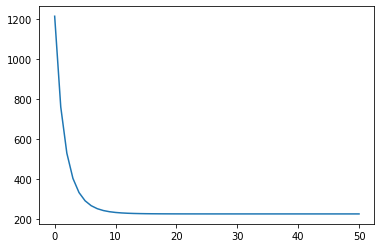

In [ ]:
# Epoch - Loss Plot
_ = plt.plot(opt[1])

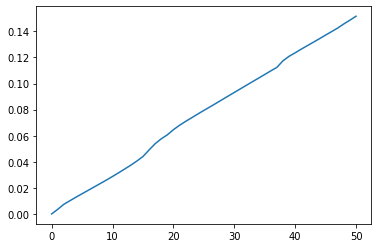

In [ ]:
# Epoch - Time Plot
_ = plt.plot(opt[2])

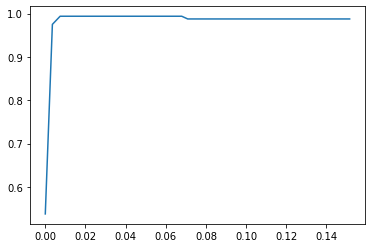

In [ ]:
# Time - Accuracy Plot
_ = plt.plot(opt[2], opt[3])

In [ ]:
# We divide the points in 2 classes depending on the sign of the relative output
plus = opt[0] >= 0
minus = opt[0] < 0

In [ ]:
x = x.reshape((-1,1))
y = y.reshape((-1,1))

In [ ]:
x_positive = x[plus]
y_positive = y[plus]

x_negative = x[minus]
y_negative = y[minus]

In [ ]:
labels = labels.reshape((-1,1))

In [ ]:
x_lab = x_lab.reshape((-1,1))
y_lab = y_lab.reshape((-1,1))

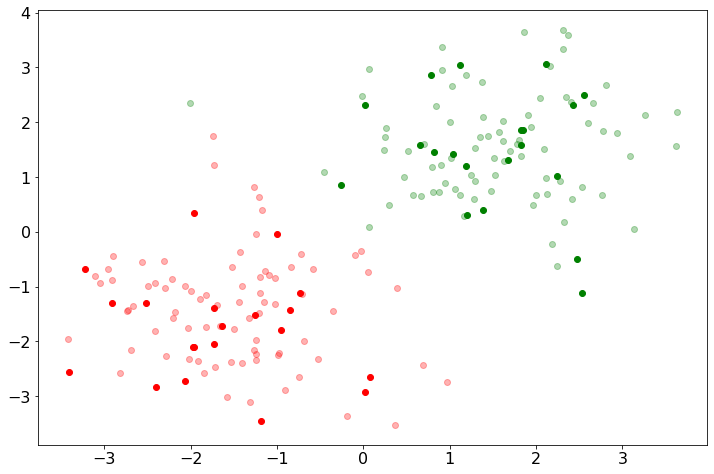

In [ ]:
_ = plt.figure(figsize = (12,8))

_ = plt.scatter(x_lab1, y_lab1, c = 'red', alpha = 1, marker = 'o')
_ = plt.scatter(x_negative, y_negative, c = 'red', alpha = 0.3, marker = 'o')

_ = plt.scatter(x_lab2, y_lab2, c = 'green', alpha = 1, marker = 'o')
_ = plt.scatter(x_positive, y_positive, c = 'green', alpha = 0.3, marker = 'o')
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)

In [ ]:
cluster = [1 if c >= 0 else -1 for c in opt[0].reshape((160,))]
accuracy = sum([cluster[i] == true_values[i] for i in range(len(cluster))])/len(cluster)
print('Accuracy : ' + str(accuracy))

Accuracy : 0.9875


## Real Data Application

In [ ]:
# MOBILE PRICE CLASSIFICATION DATASET
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification

train = pd.read_csv('train.csv')

In [ ]:
class1 = train[train['price_range'] == 0][:100]
class2 = train[train['price_range'] == 3][:100]

In [ ]:
kpoints = pd.concat([class1, class2])

In [ ]:
classes = kpoints['price_range']

In [ ]:
upoints = pd.concat([pd.DataFrame(train[train['price_range'] == 0][100:]), pd.DataFrame(train[train['price_range'] == 3][100:])])

In [ ]:
del kpoints['price_range']
del upoints['price_range']

In [ ]:
# Normalization of the features
for column in kpoints.columns:
    kpoints[column] = (kpoints[column] - np.mean(kpoints[column]))/np.std(kpoints[column])
    upoints[column] = (upoints[column] - np.mean(upoints[column]))/np.std(upoints[column])

In [ ]:
upoints.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
453,0.090270,-1.0,-0.753714,-1.010051,1.410813,0.944062,-0.412561,1.736607,1.140014,0.626243,0.355437,0.258212,-0.842582,-0.779457,-1.505265,-0.867356,0.006617,0.558100,1.007528,-1.030464
459,-1.701511,1.0,-1.234456,-1.010051,0.447184,0.944062,0.646180,-1.335523,1.365739,-0.260473,0.355437,-0.068462,-0.916131,-0.562488,-1.741988,-1.093304,-0.358471,0.558100,1.007528,-1.030464
463,-0.657845,1.0,-0.032600,0.990050,0.206277,-1.059253,-1.081239,1.736607,-0.806859,-1.147189,0.686268,-1.162596,-0.615041,-0.710750,-0.795095,0.488329,-0.175927,-1.791794,1.007528,-1.030464
464,-0.422327,1.0,1.049070,0.990050,-0.275538,0.944062,0.423287,0.371216,-0.440057,1.512959,0.851683,-0.348148,1.662666,-1.096955,0.861969,1.844015,0.006617,0.558100,-0.992528,-1.030464
467,0.422766,-1.0,0.087585,-1.010051,0.688092,-1.059253,-1.582748,0.712563,-0.129686,1.512959,0.190021,-0.824734,-1.072421,-1.347193,-0.321648,0.714277,-1.271190,0.558100,1.007528,0.970437


In [ ]:
kpoints = np.array(kpoints)
upoints = np.array(upoints)

In [ ]:
classes = np.array(classes).reshape((-1, 1))

In [ ]:
classes = [-1 if target == 0 else 1 for target in classes]
classes = np.array(classes).reshape((-1, 1))

In [ ]:
true_targets = np.ones(800)
true_targets[:400] = -1

In [ ]:
opt = optimization(kpoints, upoints, classes,true_targets, method = 'gd', rate = 2)

Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 169, loss: 1.516227, accuracy: 0.9125


In [ ]:
clusters = [-1 if target <= 0 else 1 for target in opt[0]]

In [ ]:
acc = np.sum([clusters[i] == true_targets[i] for i in range(len(true_targets))])/len(clusters)
print('Accuracy : ' + str(acc))

Accuracy : 0.9125


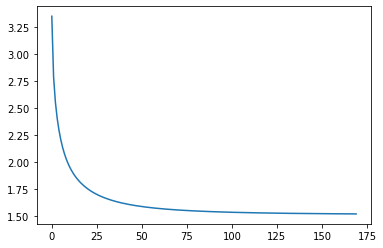

In [ ]:
_ = plt.plot(opt[1])

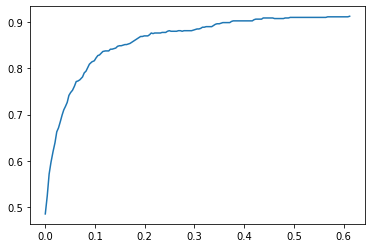

In [ ]:
_ = plt.plot(opt[2], opt[3])

In [ ]:
opt = optimization(kpoints, upoints, classes,true_targets, rate = 2.3, epochs = 15, method = 'gd')

Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 15, loss: 1.80122, accuracy: 0.77125


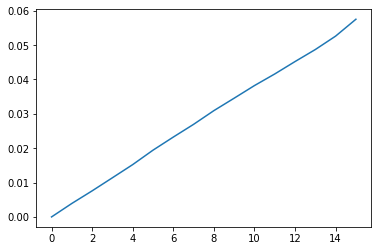

In [ ]:
_ = plt.plot(opt[2])

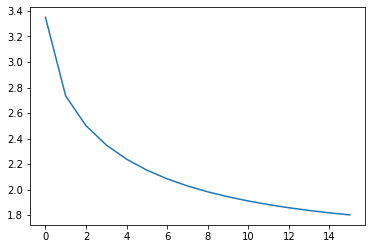

In [ ]:
_ = plt.plot(opt[1])

In [ ]:
def produce_plot(method, epochs):
  rates = [1, 1.5, 2, 2.5]
  epochs = epochs
  tol = 1e-4

  fig, axes = plt.subplots(2,2, figsize = (11,12))
  for rate in rates:
    opt = optimization(kpoints, upoints, classes, true_targets, method = method, rate = rate, epochs = epochs, tol = tol)
    cputime = opt[2][-1]
    clusters = [-1 if target <= 0 else 1 for target in opt[0]]
    accuracy = np.sum([clusters[i] == true_targets[i] for i in range(len(true_targets))])*100/800

    axes[rates.index(rate)//2, rates.index(rate)%2].plot(opt[2],opt[1])
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 3
    
    leg = ['Accuracy =' + str(round(accuracy, 2)), 'CPU time =' + str(round(cputime,4))] 
    axes[rates.index(rate)//2, rates.index(rate)%2].legend(handles,leg, loc = 'best', fontsize = 14)
    axes[rates.index(rate)//2, rates.index(rate)%2].set_xlabel('Time', fontsize = 15)
    axes[rates.index(rate)//2, rates.index(rate)%2].set_ylabel('Loss', fontsize = 15)
    axes[rates.index(rate)//2, rates.index(rate)%2].set_title('lr = ' + str(rate) + ', epochs = ' + str(len(opt[1])), fontsize = 16)
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)#.set_yticks(fontsize = 14)

Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.53152, accuracy: 0.89875
Epoch: 269, loss: 1.521089, accuracy: 0.91
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.518471, accuracy: 0.91
Epoch: 206, loss: 1.517866, accuracy: 0.91
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 169, loss: 1.516227, accuracy: 0.9125
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.9523389064828098e+37, accuracy: 0.51
Epoch: 400, loss: 2.2444968154733128e+77, accuracy: 0.51
Epoch: 500, loss: 2.406583228688798e+97, accuracy: 0.51


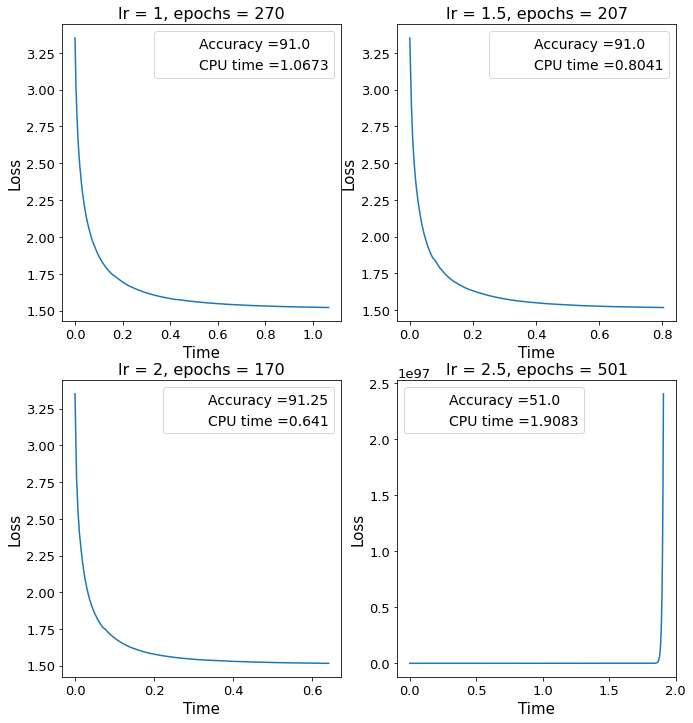

In [ ]:
method = 'gd'

produce_plot(method,500)

Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.531149, accuracy: 0.89875
Epoch: 268, loss: 1.520999, accuracy: 0.91
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.518264, accuracy: 0.91
Epoch: 204, loss: 1.517865, accuracy: 0.91
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 167, loss: 1.516222, accuracy: 0.91125
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 143, loss: 1.515151, accuracy: 0.91375


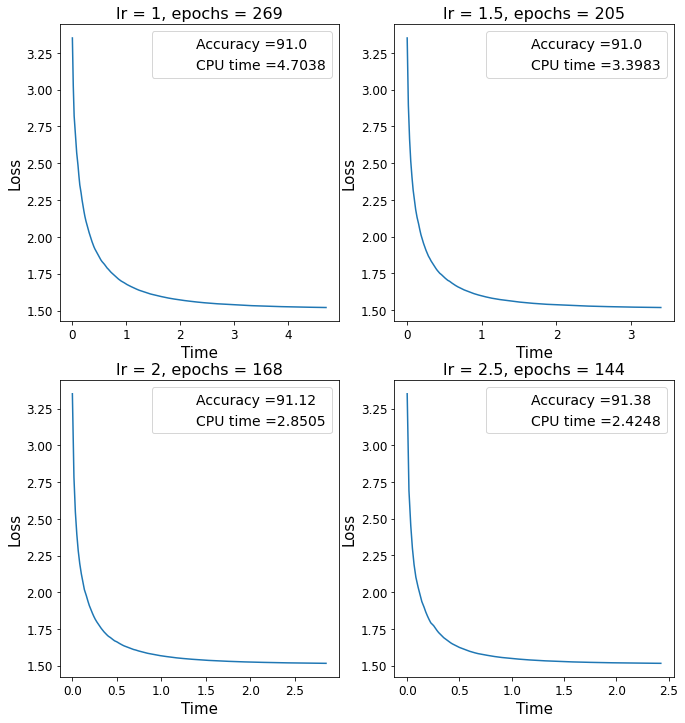

In [ ]:
method = 'cyclic'
produce_plot(method,500)

Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 3.261285, accuracy: 0.48875
Epoch: 400, loss: 3.162291, accuracy: 0.495
Epoch: 600, loss: 3.136896, accuracy: 0.49875
Epoch: 800, loss: 3.116247, accuracy: 0.5025
Epoch: 1000, loss: 3.073606, accuracy: 0.51125
Epoch: 1200, loss: 3.028063, accuracy: 0.515
Epoch: 1400, loss: 2.969994, accuracy: 0.5275
Epoch: 1600, loss: 2.952764, accuracy: 0.5325
Epoch: 1800, loss: 2.831663, accuracy: 0.53875
Epoch: 2000, loss: 2.800301, accuracy: 0.545
Epoch: 2200, loss: 2.776726, accuracy: 0.5475
Epoch: 2400, loss: 2.753329, accuracy: 0.55
Epoch: 2600, loss: 2.723304, accuracy: 0.5575
Epoch: 2800, loss: 2.69669, accuracy: 0.56375
Epoch: 3000, loss: 2.643318, accuracy: 0.56625
Epoch: 3200, loss: 2.611826, accuracy: 0.57125
Epoch: 3400, loss: 2.573285, accuracy: 0.575
Epoch: 3600, loss: 2.561448, accuracy: 0.5775
Epoch: 3800, loss: 2.551238, accuracy: 0.57875
Epoch: 4000, loss: 2.535435, accuracy: 0.5875
Epoch: 4200, loss: 2.510593, accuracy: 0.

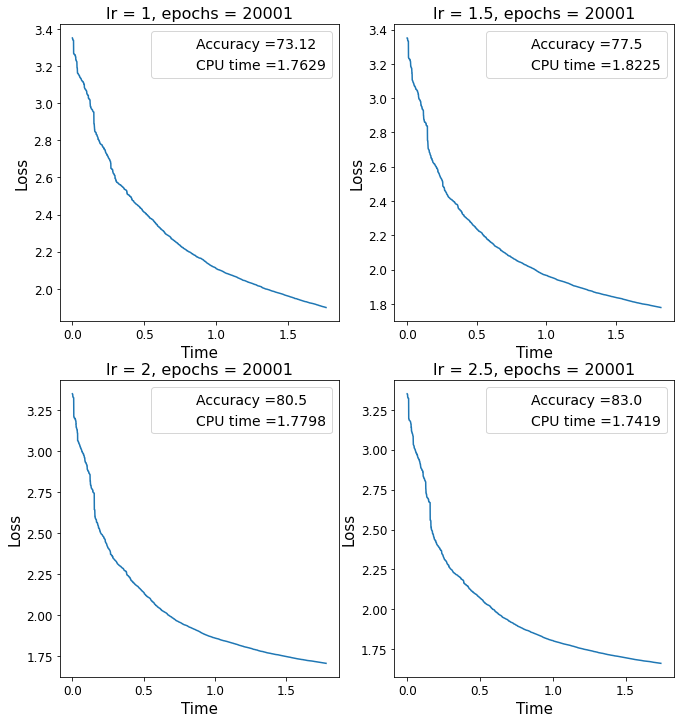

In [ ]:
method = 'random'
produce_plot(method,20000)

In [ ]:
gd_opt = optimization(kpoints, upoints, classes, true_targets, method = 'gd', rate = 2, epochs = 2000, tol = 1e-6)
cyclic_opt = optimization(kpoints, upoints, classes, true_targets, method = 'cyclic', rate = 2.5, epochs = 2000, tol = 1e-6)
random_opt = optimization(kpoints, upoints, classes, true_targets, method = 'random', rate = 2.5, epochs = 40000)

Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.513956, accuracy: 0.915
Epoch: 400, loss: 1.51048, accuracy: 0.91625
Epoch: 579, loss: 1.510112, accuracy: 0.9175
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 1.512016, accuracy: 0.9175
Epoch: 400, loss: 1.510211, accuracy: 0.9175
Epoch: 492, loss: 1.510079, accuracy: 0.9175
Epoch: 0, loss: 3.350952, accuracy: 0.485
Epoch: 200, loss: 3.18003, accuracy: 0.49125
Epoch: 400, loss: 3.032397, accuracy: 0.50625
Epoch: 600, loss: 2.980794, accuracy: 0.52125
Epoch: 800, loss: 2.938556, accuracy: 0.53125
Epoch: 1000, loss: 2.879492, accuracy: 0.5475
Epoch: 1200, loss: 2.819669, accuracy: 0.5675
Epoch: 1400, loss: 2.703133, accuracy: 0.585
Epoch: 1600, loss: 2.66958, accuracy: 0.59375
Epoch: 1800, loss: 2.47516, accuracy: 0.6
Epoch: 2000, loss: 2.430208, accuracy: 0.6075
Epoch: 2200, loss: 2.397243, accuracy: 0.615
Epoch: 2400, loss: 2.374314, accuracy: 0.62375
Epoch: 2600, loss: 2.335421, accuracy: 0.62625
Epoch: 2800,

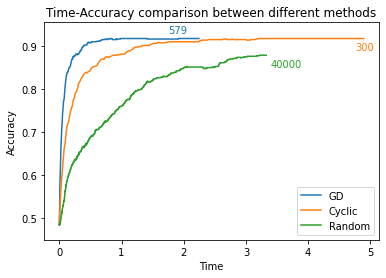

In [ ]:
_ = plt.plot(gd_opt[2], gd_opt[3], label = 'GD')
_ = plt.plot(cyclic_opt[2][:300], cyclic_opt[3][:300], label = 'Cyclic')
_ = plt.plot(random_opt[2], random_opt[3], label = 'Random')
_ = plt.legend()
_ = plt.text(1.755, 0.93, '579', color = 'C0')
_ = plt.text(4.75, 0.89, '300', color = 'C1')
_ = plt.text(3.4, 0.85, '40000', color = 'C2')
axes = plt.gca()
axes.set_ylim([0.45,0.955])
_ = plt.xlabel('Time')
_ = plt.ylabel('Accuracy')
_ = plt.title('Time-Accuracy comparison between different methods')

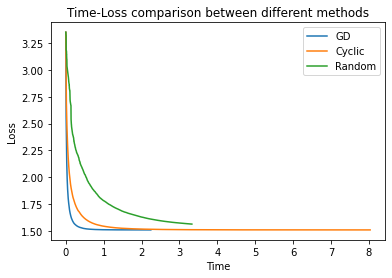

In [ ]:
_ = plt.plot(gd_opt[2], gd_opt[1])
_ = plt.plot(cyclic_opt[2], cyclic_opt[1])
_ = plt.plot(random_opt[2], random_opt[1])
_ = plt.legend(['GD','Cyclic','Random'])
_ = plt.xlabel('Time')
_ = plt.ylabel('Loss')
_ = plt.title('Time-Loss comparison between different methods')